In [ ]:
import matplotlib.pyplot as plt
import numpy as np

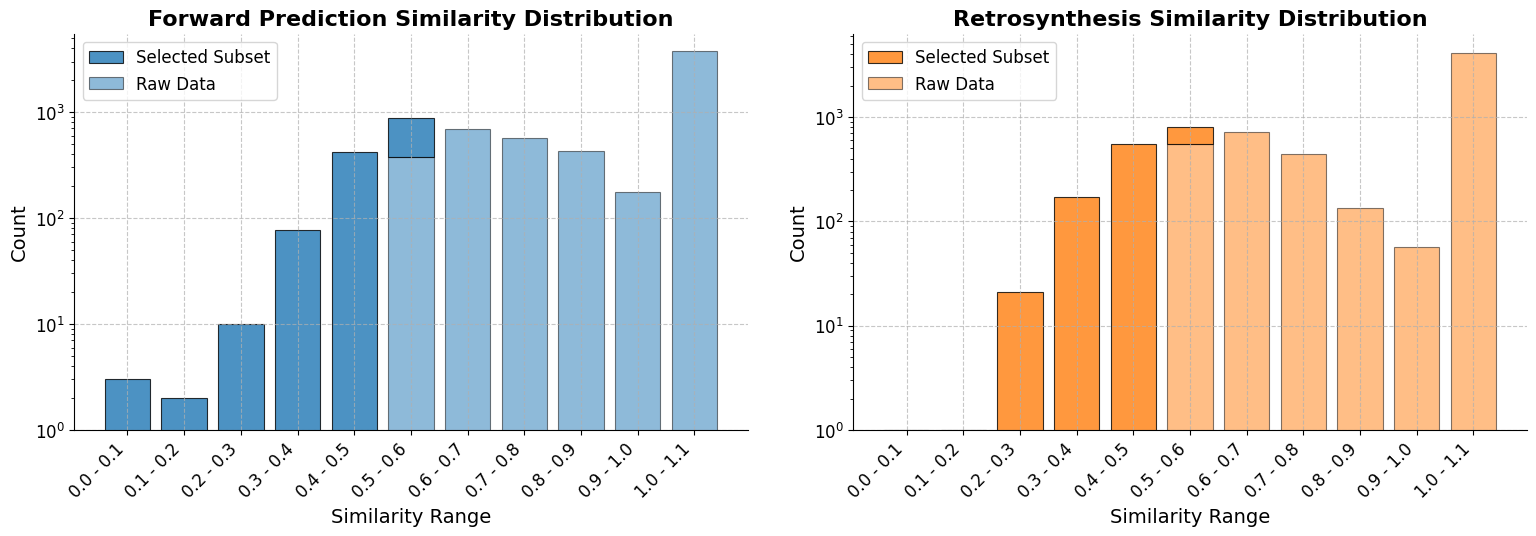

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# FS data
fs_similarity_ranges = [
    '0.0 - 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.4', '0.4 - 0.5',
    '0.5 - 0.6', '0.6 - 0.7', '0.7 - 0.8', '0.8 - 0.9', '0.9 - 1.0',
    '1.0 - 1.1'
]
fs_similarity_counts = [3, 2, 10, 77, 418, 870, 690, 570, 429, 176, 3767]

# RS data
rs_similarity_ranges = [
    '0.0 - 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.4', '0.4 - 0.5',
    '0.5 - 0.6', '0.6 - 0.7', '0.7 - 0.8', '0.8 - 0.9', '0.9 - 1.0',
    '1.0 - 1.1'
]
rs_similarity_counts = [1, 1, 21, 172, 548, 806, 726, 446, 134, 57, 4158]

# Calculate cumulative sum of counts
fs_cumsum = np.cumsum(fs_similarity_counts)
rs_cumsum = np.cumsum(rs_similarity_counts)

# Find the index where cumulative sum reaches or exceeds 1000
fs_index = np.where(fs_cumsum >= 1000)[0][0]
rs_index = np.where(rs_cumsum >= 1000)[0][0]

# Calculate the count for the boundary range
fs_boundary_count = 1000 - (fs_cumsum[fs_index-1] if fs_index > 0 else 0)
rs_boundary_count = 1000 - (rs_cumsum[rs_index-1] if rs_index > 0 else 0)

# Adjust the counts for the boundary range
fs_similarity_counts[fs_index] -= fs_boundary_count
rs_similarity_counts[rs_index] -= rs_boundary_count

# Set plot style
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot FS data
ax1.bar(fs_similarity_ranges[:fs_index], fs_similarity_counts[:fs_index], color='#1f77b4', alpha=0.8, edgecolor='black', linewidth=0.8, label='Selected Subset')
ax1.bar(fs_similarity_ranges[fs_index:], fs_similarity_counts[fs_index:], color='#1f77b4', alpha=0.5, edgecolor='black', linewidth=0.8, label='Raw Data')
ax1.bar(fs_similarity_ranges[fs_index], fs_boundary_count, bottom=fs_similarity_counts[fs_index], color='#1f77b4', alpha=0.8, edgecolor='black', linewidth=0.8)
ax1.set_title('Forward Prediction Similarity Distribution', fontsize=16, fontweight='bold')
ax1.set_xlabel('Similarity Range', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_yscale('log')
ax1.set_ylim(bottom=1)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper left', fontsize=12)

# Plot RS data
ax2.bar(rs_similarity_ranges[:rs_index], rs_similarity_counts[:rs_index], color='#ff7f0e', alpha=0.8, edgecolor='black', linewidth=0.8, label='Selected Subset')
ax2.bar(rs_similarity_ranges[rs_index:], rs_similarity_counts[rs_index:], color='#ff7f0e', alpha=0.5, edgecolor='black', linewidth=0.8, label='Raw Data')
ax2.bar(rs_similarity_ranges[rs_index], rs_boundary_count, bottom=rs_similarity_counts[rs_index], color='#ff7f0e', alpha=0.8, edgecolor='black', linewidth=0.8)
ax2.set_title('Retrosynthesis Similarity Distribution', fontsize=16, fontweight='bold')
ax2.set_xlabel('Similarity Range', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_yscale('log')
ax2.set_ylim(bottom=1)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(loc='upper left', fontsize=12)

# Adjust spacing between subplots and layout
fig.subplots_adjust(wspace=0.3)
fig.tight_layout(pad=3)

# Save the plot as a high-resolution image
plt.savefig('fs_rs_scaffold.pdf', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()